In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pathlib,os
dataset_url = os.path.join('../input/ganyu-genshin-impact-anime-faces-gan-training/ganyu/ganyu-final/')
data_dir = pathlib.Path(dataset_url)
os.path.exists(dataset_url)
#ganyu_dir = pathlib.Path(data_dir)

True

In [3]:
image_count = len(list(data_dir.glob('*.jpg')))
print(image_count)

850


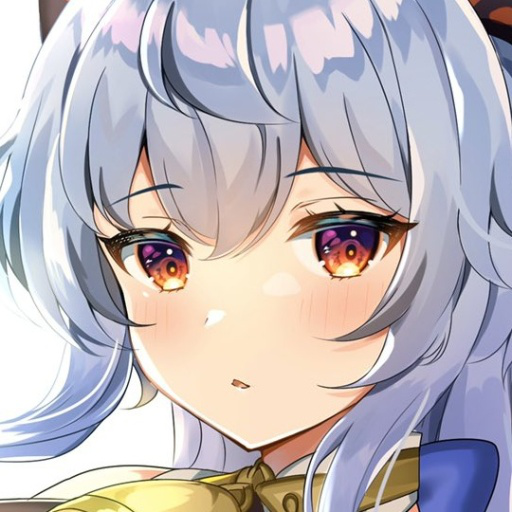

In [4]:
ganyu = list(data_dir.glob('*.jpg'))
PIL.Image.open(str(ganyu[3]))

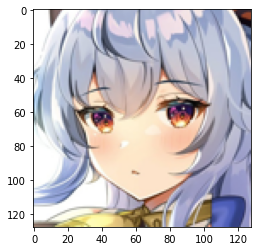

In [5]:
image = PIL.Image.open(str(ganyu[3]))
image = image.resize((128,128))
plt.imshow(image)

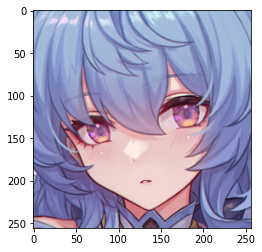

In [6]:
image = PIL.Image.open(str(ganyu[100]))
image = image.resize((256,256))
plt.imshow(image)

In [7]:
batch_size = 32
img_height = 180
img_width = 180